<a href="https://colab.research.google.com/github/AzlinRusnan/Python-Coding/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualisation purpose
import seaborn as sns # visualisation purpose
import warnings
warnings.filterwarnings('ignore')

In [3]:
from io import StringIO

# Simulated raw data
raw_data = StringIO("""
Date,Sales,Temperature,Product_Type
2024-01-01,200,30,Electronics
2024-01-02,180,27,Clothing
2024-01-03,,25,Electronics
2024-01-04,210,-999,Clothing
2024-01-05,205,29,Electronics
2024-01-06,250,31,
2024-01-07,5000,26,Electronics
2024-01-08,190,28,Clothing
2024-01-09,170,999,Electronics
2024-01-10,180,27,Clothing
""")

# Creating DataFrame
df_raw = pd.read_csv(raw_data, parse_dates=['Date'])

print(df_raw)

        Date   Sales  Temperature Product_Type
0 2024-01-01   200.0           30  Electronics
1 2024-01-02   180.0           27     Clothing
2 2024-01-03     NaN           25  Electronics
3 2024-01-04   210.0         -999     Clothing
4 2024-01-05   205.0           29  Electronics
5 2024-01-06   250.0           31          NaN
6 2024-01-07  5000.0           26  Electronics
7 2024-01-08   190.0           28     Clothing
8 2024-01-09   170.0          999  Electronics
9 2024-01-10   180.0           27     Clothing


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   Sales         9 non-null      float64       
 2   Temperature   10 non-null     int64         
 3   Product_Type  9 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 448.0+ bytes


In [6]:
df_raw.isnull().sum().to_frame()

,0
Date,0
Sales,1
Temperature,0
Product_Type,1


In [7]:
df_raw.duplicated().sum()

0

In [14]:
#Data Cleaning

# Fill missing values in 'Sales'
df_raw['Sales'] = df_raw['Sales'].fillna(df_raw['Sales'].median())

# Fill missing values in 'Product_Type'
df_raw['Product_Type'] = df_raw['Product_Type'].fillna('Unknown')

# Handle outliers in 'Temperature'
temp_median = df_raw[(df_raw['Temperature'] != -999) & (df_raw['Temperature'] != 000)]['Temperature'].median()
df_raw['Temperature'] = df_raw['Temperature'].replace([-999, 999], temp_median)

# Handling the outlier in 'Sales' using IQR
Q1 = df_raw['Sales'].quantile(0.25)
Q3 = df_raw['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#remove outlier
df_raw['Sales'] = np.where(df_raw['Sales'] > upper_bound, upper_bound, df_raw['Sales'])

,Date,Sales,Temperature,Product_Type
0,2024-01-01,200.000,30,Electronics
1,2024-01-02,180.000,27,Clothing
2,2024-01-03,200.000,25,Electronics
3,2024-01-04,210.000,28,Clothing
4,2024-01-05,205.000,29,Electronics
5,2024-01-06,248.125,31,Unknown
6,2024-01-07,248.125,26,Electronics
7,2024-01-08,190.000,28,Clothing
8,2024-01-09,170.000,28,Electronics
9,2024-01-10,180.000,27,Clothing


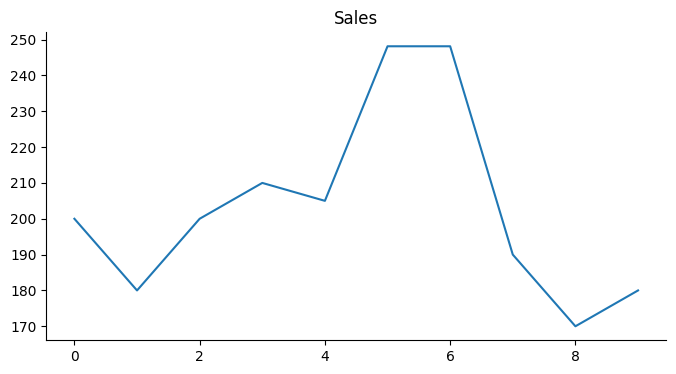

In [20]:
# @title Sales

from matplotlib import pyplot as plt
df_raw['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

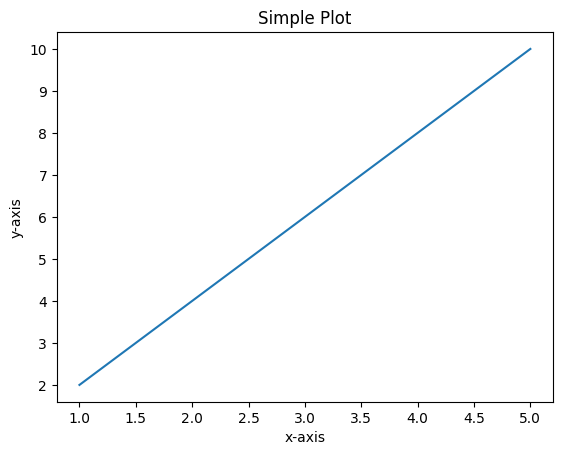

In [ ]:
# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

#Plot the data
plt.plot(x,y)

#Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Simple Plot');

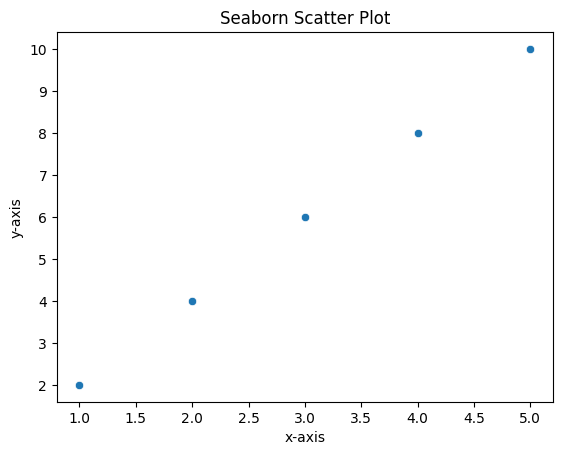

In [ ]:
# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

#Create a pandas DataFrame using the data
data = {'x':x, 'y': y} #this is library
df = pd.DataFrame(data)
df

#Create a scatterplot using seaborn
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Seaborn Scatter Plot');

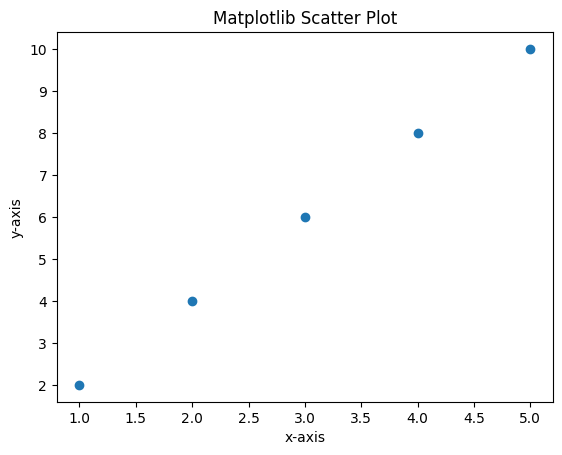

In [ ]:
# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

#Create a pandas DataFrame using the data
data = {'x':x, 'y': y} #this is library
df = pd.DataFrame(data)
df

#Create a scatterplot using Matplotlib
plt.scatter(x = 'x', y = 'y', data = df)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Matplotlib Scatter Plot');

Text(0.5, 1.0, 'Matplotlib histogram')

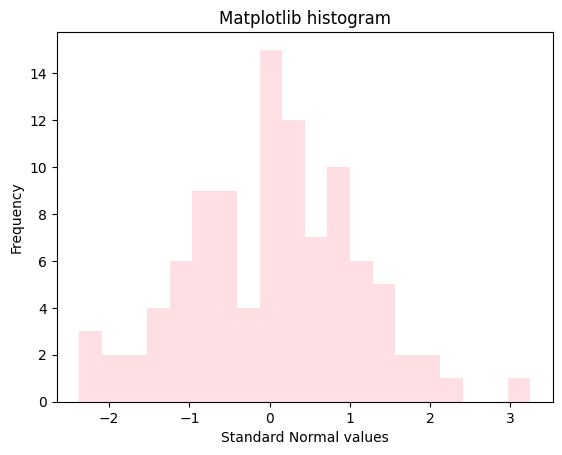

In [ ]:
# Matplotlib Histogram
#alpha = 0.8 sets the transparency of the bars
#alpha value the transparency of the bar
#normal distribution -> bell-shape curve
#standard normal -> mean = 0, sd = 1

rng = np.random.RandomState(12345)
plt.hist(rng.standard_normal(100), bins = 20, color = 'pink', alpha = 0.5)

#add label and title
plt.xlabel('Standard Normal values')
plt.ylabel('Frequency')
plt.title('Matplotlib histogram')

In [ ]:
plt.Rectangle?

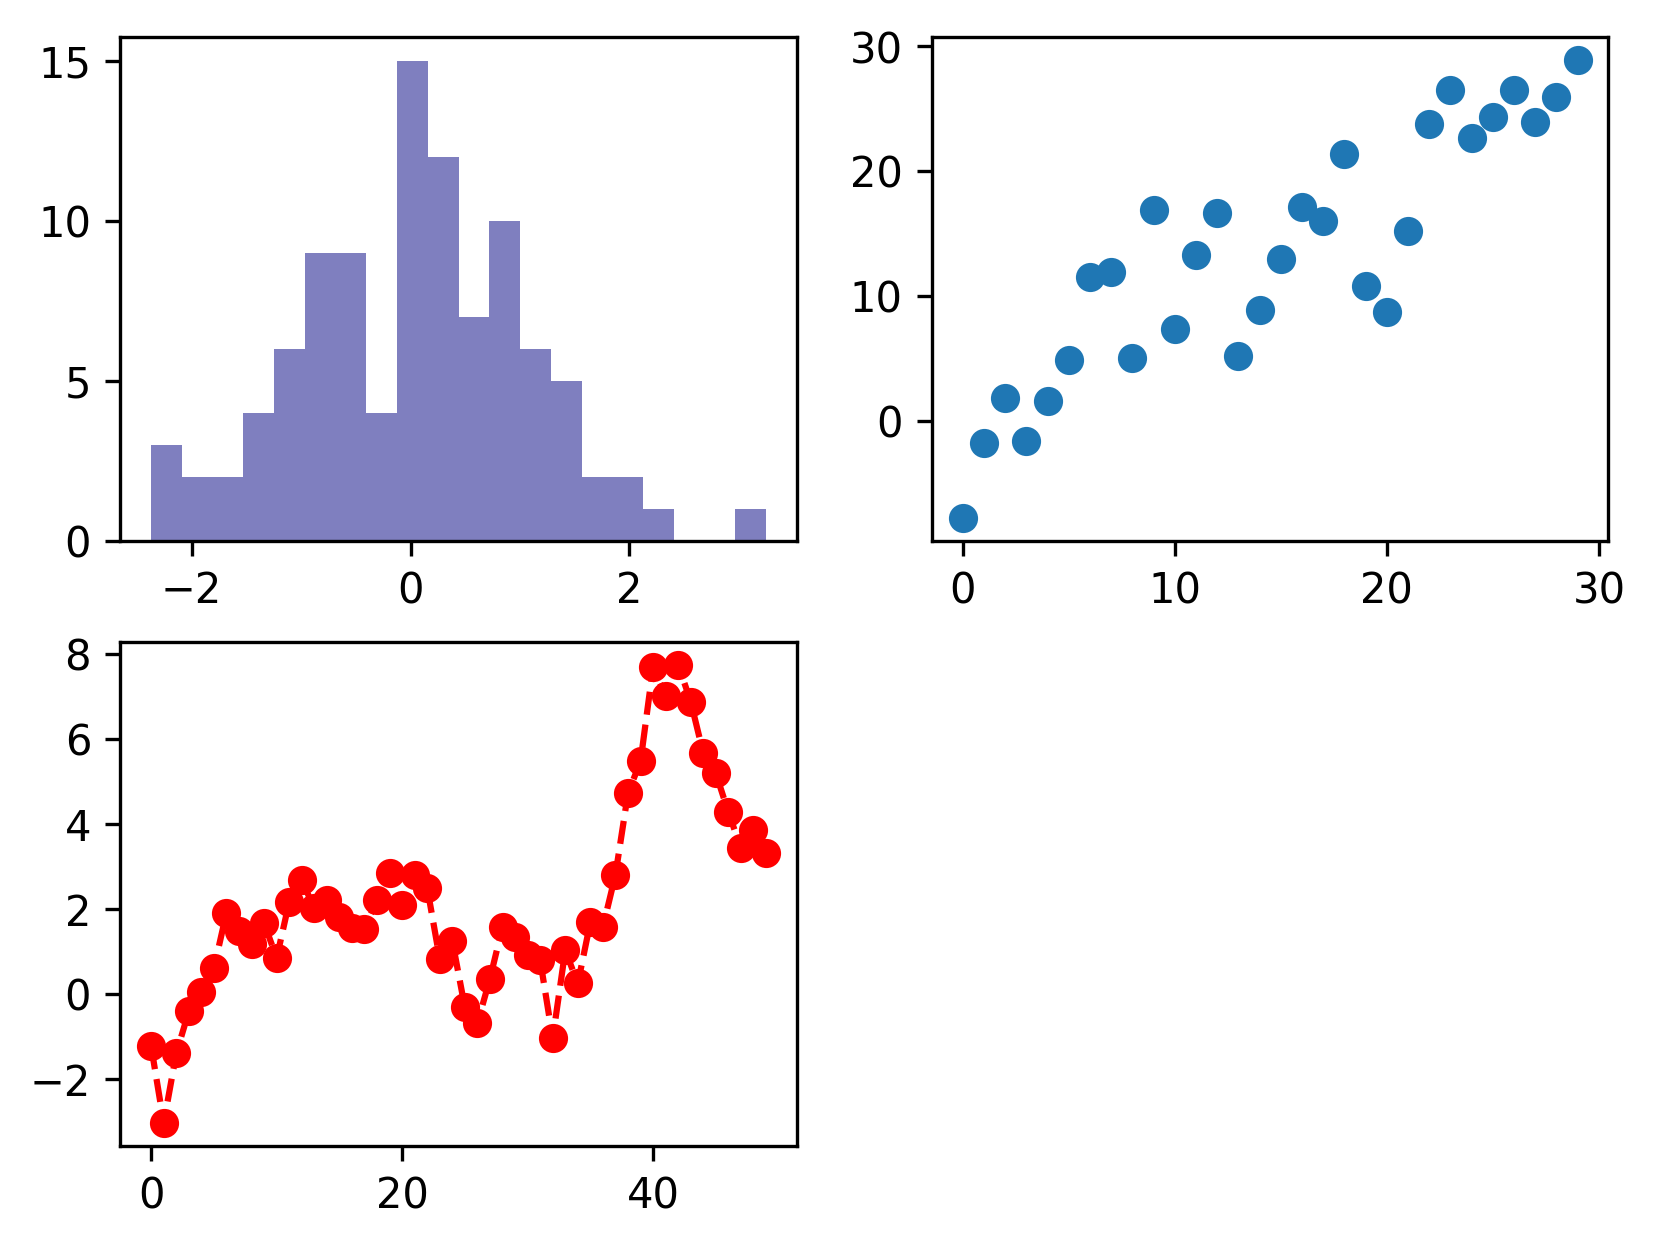

In [ ]:
#create one or more subplots
#2 x 2; 4 plots in total
rng = np.random.RandomState(12345)
fig = plt.figure(dpi=300) # this is to set the resolution of the figure

#set up the subplot
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(rng.standard_normal(100), bins = 20, color = 'navy', alpha = 0.5)
ax2.scatter(x=np.arange(30), y = np.arange(30) + 5 * rng.standard_normal(30))
ax3.plot(rng.standard_normal(50).cumsum(), color = 'red', linestyle = 'dashed',marker = 'o')

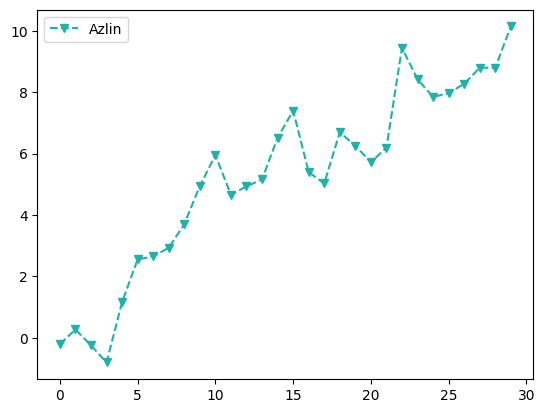

In [ ]:
# adding markers on line plot
rng = np.random.RandomState(12345)
plt.plot(rng.standard_normal(30).cumsum(), color = '#20b2aa', linestyle = 'dashed', marker = 'v', label = 'Azlin')
plt.legend();

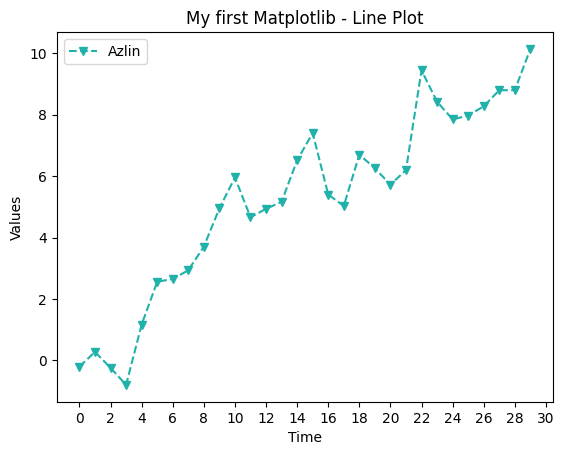

In [ ]:
#xaxis ticks annotation
rng = np.random.RandomState(12345)
plt.plot(rng.standard_normal(30).cumsum(), color = '#20b2aa', linestyle = 'dashed', marker = 'v', label = 'Azlin')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(range(0,32,2));
plt.title('My first Matplotlib - Line Plot');

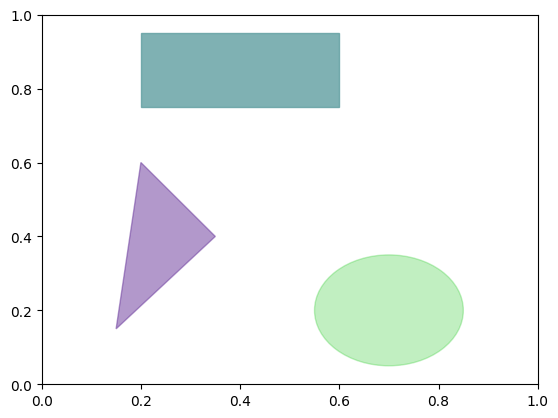

In [ ]:
# adding shapes to plot
fig, ax = plt.subplots()

# rectangle shape
# 0.4 -> width of the xaxis
# 0.2 -> 0.75 + 0.2 = 0.95 -> height of the rectangle
rect = plt.Rectangle((0.2,0.75),0.4,0.2, color = '#5f9ea0', alpha = 0.8)

# circle shape
# 0.15 -> radius of the circle
circ = plt.Circle((0.7,0.2), 0.15, color = '#32cd32', alpha = 0.3)

# triangle shape
# hexagon -> polygon of 6 sides
trig = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color = '#663399', alpha = 0.5)

#plot shapes
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(trig);

<ipython-input-5-81ebd8434668>:22: MatplotlibDeprecationWarning: Passing the radius parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  hex = mpatches.RegularPolygon((0.7,0.8),6,0.1, color = '#ff4500') #6 edges


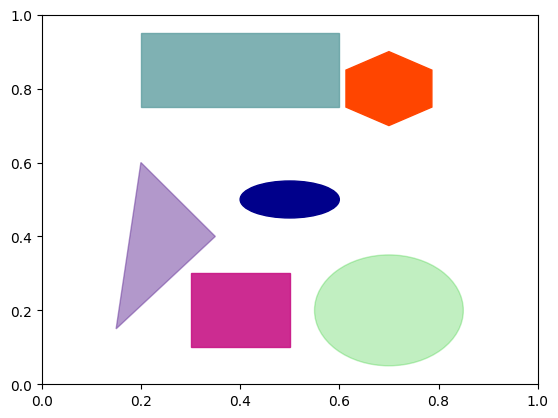

In [ ]:
# Adding shapes to a plot : Attention
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

#rect, circ, tri
rect = plt.Rectangle((0.2,0.75), 0.4, 0.2, color = '#5f9ea0', alpha = 0.8)
circ = plt.Circle((0.7,0.2), 0.15, color = '#32cd32', alpha = 0.3)
tri = plt.Polygon([[0.15, 0.15], [0.35,0.4], [0.2,0.6]], color = '#663399', alpha = 0.5)

# square shape
sqr = plt.Rectangle((0.3,0.1), 0.2,0.2, color = '#c71585', alpha = 0.9)

# ellipse shape
# (0.5,0.5) -> This tuple spcifies the center of the ellipse
# 0.2 -> width of the ellipse
# 0.1 -> heigh of the ellipse
ellipse = mpatches.Ellipse((0.5,0.5),0.2,0.1, color = '#00008b',)

# hexagon shape
# 6 -> specify number of sides in the regular polygon
# 0.1 -> distance from the center of the circumcircle (the point at the center of the hexagon) to any of its vertices
hex = mpatches.RegularPolygon((0.7,0.8),6,0.1, color = '#ff4500') #6 edges

# Add all the subplot togethr
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(tri)
ax.add_patch(sqr)
ax.add_patch(ellipse)
ax.add_patch(hex);

In [ ]:
# Dealing with Data Frame
# A little project: dataset about restaurant tipping
# Download the tips data here: https://bit.ly/3jCROII
tips = pd.read_csv("https://bit.ly/3jCROII")
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
# using crosstab() function to compute a simple cross-tabulation of two(or more) factors.
# create a two factors data frame
party_count = pd.crosstab(tips['day'], tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
# Reindex the DataFrame to the desired day order
desired_order = ['Thur','Fri','Sat','Sun']
party_count_reordered = party_count.reindex(desired_order)
party_count_reordered

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [ ]:
# Extract party_counts from col 2 to 5
# using loc method - explicit, using it as a label
# 2:5 is the column name; they are not integer in this case
party_count_reordered_edit = party_count_reordered.loc[:,2:5]
party_count_reordered_edit

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
